# Code associated with *Tonian paleomagnetic poles from South China are consistent with progressive plate tectonic motion over the North Pole*

This code conducts E/I analysis and incorporates uncertainties associated with inclination shallowing into Tonian paleomagnetic poles from South China. The approach is to use the specimen fits of Jing et al. (2025) to conduct the E/I analysis as done in the original contribution. The f factors that are returned by the E/I bootstrap procedure are then used to propagate uncertainty into the pole using the method developed in Pierce et al. (2022). For other sedimentary poles, the approach is to apply the range of f factors from the literature to propagate inclination shallowing uncertainty into the poles. After this analysis is done, the poles are plotted with Kent ellipses for the sedimentary poles. A reconstruction is then developed that reconstructs both the poles and the continent in a simple model of South China transiting over the North Pole. While vertical axis rotations could play a role in discrepant pole positions, the overall paleomagnetic pole record requires that South China transited over a geographic pole through this time interval.

In addition to honoring the South China poles, this reconstruction utilizes the Malani Igneous Suite pole of India (Meert et al., 2013). 

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm, colors
import numpy as np

import cartopy.crs as ccrs
import xml.etree.ElementTree as ET
from paleogeo_functions import *

## Import and plot Jing et al. 2025 directions

Measurement level data were not provided by the authors associated with the publication. Directions in tilt-corrected coordinates resulting from specimen-level fits were provided in Table S1. These directions are imported below.

In [2]:
Jing2025_lat = 29.10
Jing2025_lon = 102.84

Jing_directions = pd.read_csv("./data/Jing2025_directions.csv")
Jing_directions.head()

,sample,declination,inclination,strat_level,MAD
0,SL181,288.0,-33.8,100.0,9.2
1,SL182,317.6,-41.5,100.1,3.5
2,SL183,314.1,-38.9,100.2,5.5
3,SL184,315.9,-36.5,100.3,5.0
4,SL185,330.8,-42.9,102.0,0.5


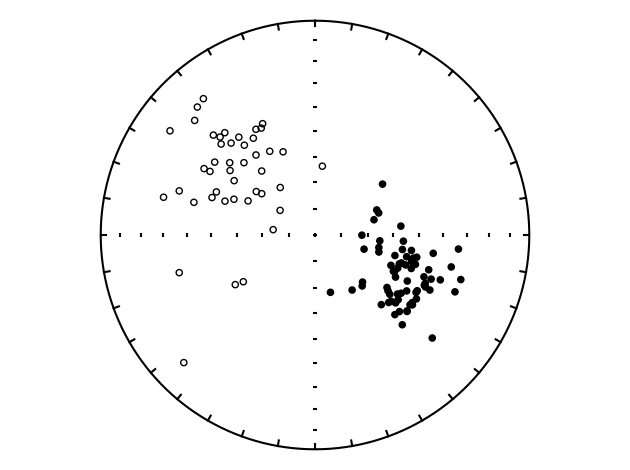

In [3]:
ipmag.plot_net()
ipmag.plot_di(Jing_directions['declination'], Jing_directions['inclination'])

### Filtering out site SL25

The number of specimen fits within Table S1 is 113. The text of the paper describes that data from SL25 were excluded resulting in 105 specimens being used for the E/I analysis.

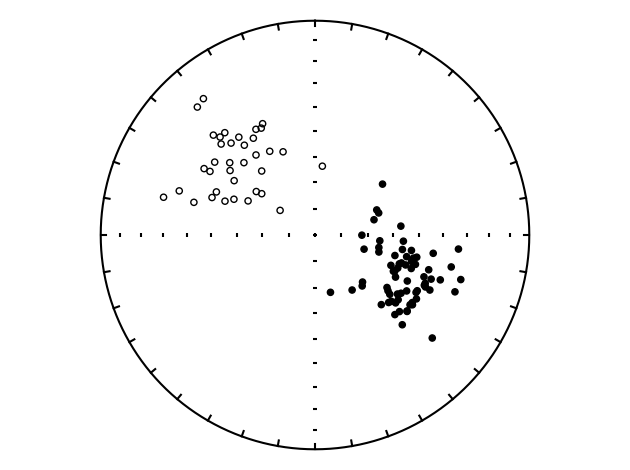

In [4]:
Jing_directions_filtered = Jing_directions[~Jing_directions['sample'].isin([
    'SL251', 'SL254', 'SL255', 'SL257', 'SL258', 'SL259', 'SL2510', 'SL2511'
])]
ipmag.plot_net()
ipmag.plot_di(Jing_directions_filtered['declination'].tolist(), 
              Jing_directions_filtered['inclination'].tolist())

### Reversal tests

On the unfiltered specimen directions (provided in tilt-corrected coordinates):

In [5]:
ipmag.reversal_test_MM1990(dec=Jing_directions['declination'].tolist(), 
                           inc=Jing_directions['inclination'].tolist())

Results of Watson V test: 

Watson's V:           8.6
Critical value of V:  6.2
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 8.2
Critical angle for M&M1990:   7.0



(0, 8.17608253673359, 6.974132426876705, '')

On the filtered specimen directions (with SL25 removed):

In [6]:
ipmag.reversal_test_MM1990(dec=Jing_directions_filtered['declination'].tolist(), 
                           inc=Jing_directions_filtered['inclination'].tolist())

Results of Watson V test: 

Watson's V:           28.9
Critical value of V:  6.2
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 12.4
Critical angle for M&M1990:   5.8



(0, 12.439453394876354, 5.776494636116234, '')

### Apply E/I analysis to the Jing et al. 2025 data

We can apply E/I analysis to the Jing et al. 2025 data and then use the confidence bounds on the f-factor to calculate a pole that incorporates such uncertainty.

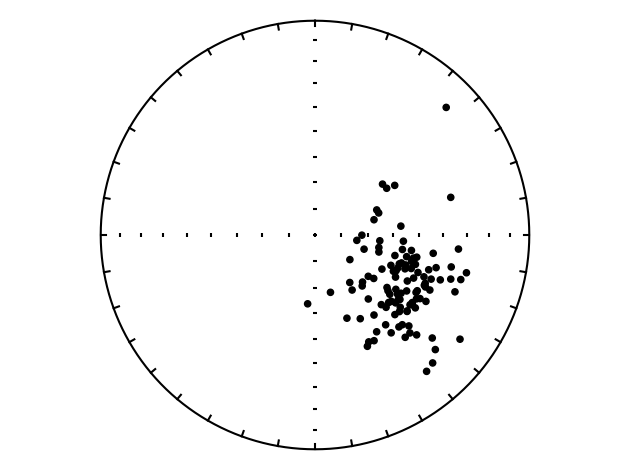

In [7]:
Jing_directions_unified = np.array(pmag.flip(ipmag.make_di_block(Jing_directions['declination'], Jing_directions['inclination']), 
                                              combine=True))
ipmag.plot_net()
ipmag.plot_di(di_block= Jing_directions_unified)

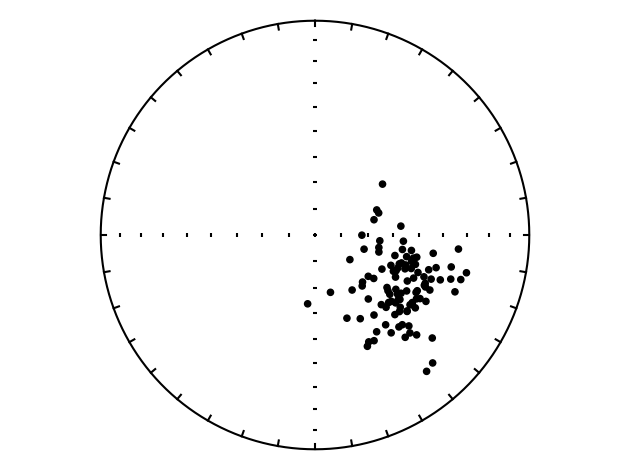

In [8]:
Jing_directions_filtered_unified = np.array(pmag.flip(ipmag.make_di_block(dec=Jing_directions_filtered['declination'].tolist(), 
                                             inc=Jing_directions_filtered['inclination'].tolist()), 
                                              combine=True))
ipmag.plot_net()
ipmag.plot_di(di_block= Jing_directions_filtered_unified)

#### E/I analysis on unfiltered data

Bootstrapping.... be patient



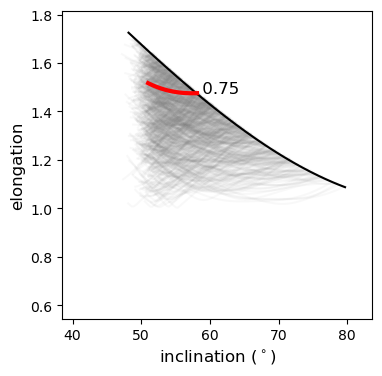

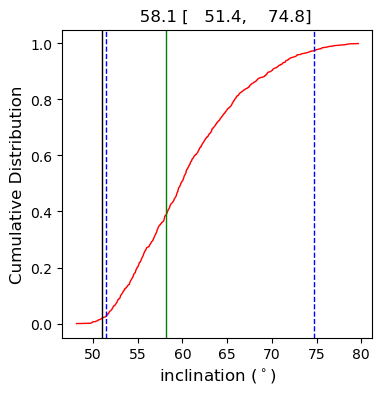

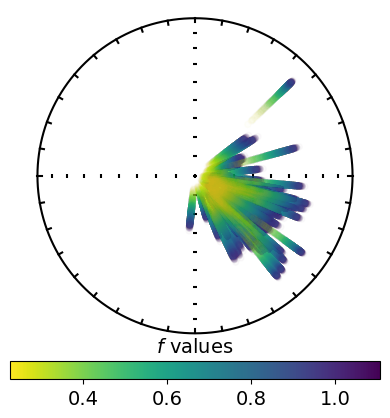

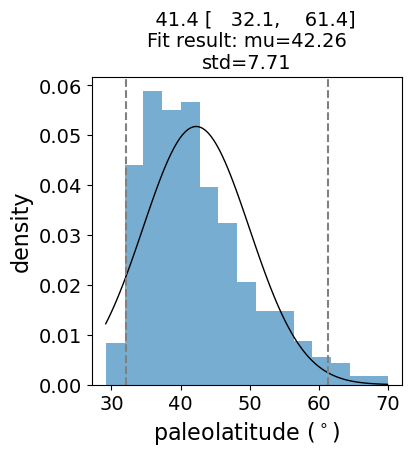

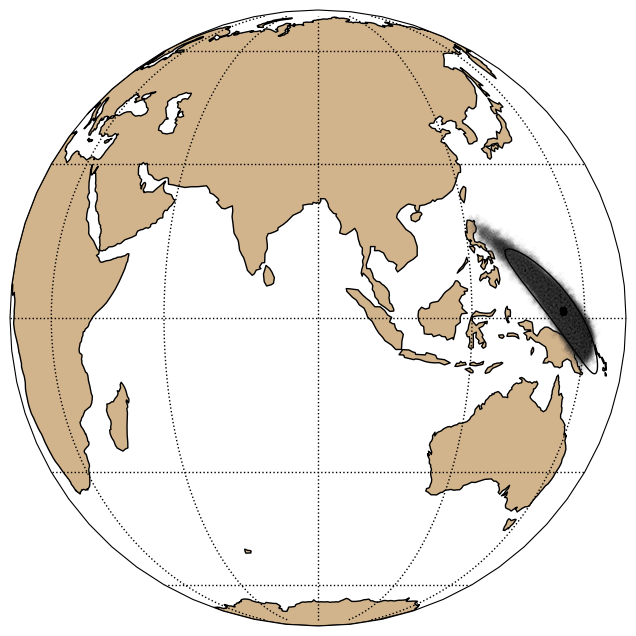

The original inclination was: 51.0

The corrected inclination is: 58.12
with bootstrapped confidence bounds of: 51.4 to 74.77
and elongation parameter of: 1.48
The flattening factor is: 0.75
with bootstrapped confidence bounds of: 0.99 to 0.34

The Kent mean incorporating inclination flattening uncertainty is:
Plon: 142.7  Plat: 1.3
Major axis lon: 51.6  Major axis lat: 39.6
Minor axis lon: 234.3  Minor axis lat: 50.3
Major axis angle of 95% ellipse (Zeta): 18.0
Minor axis angle of 95% ellipse (Eta): 3.4
Number of directions in mean (n): 100000


In [9]:
Jing2025_Kent_mean_pole = ipmag.find_ei_kent(Jing_directions_unified, Jing2025_lat, Jing2025_lon, central_longitude=90)

#### E/I analysis on filtered data

Bootstrapping.... be patient



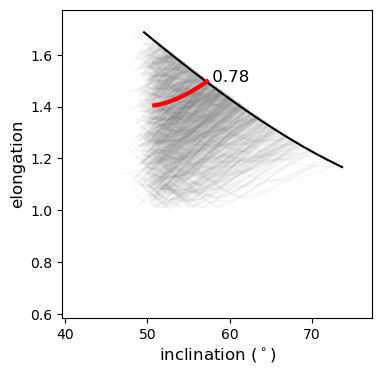

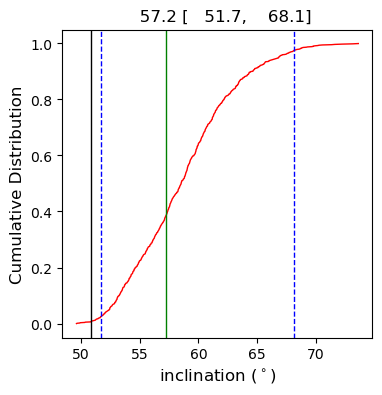

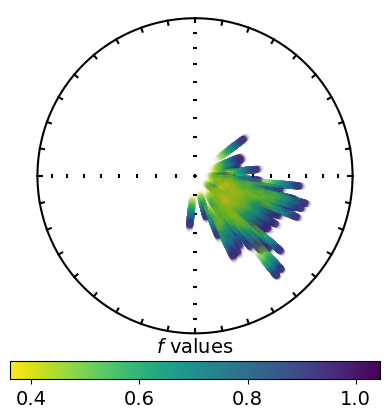

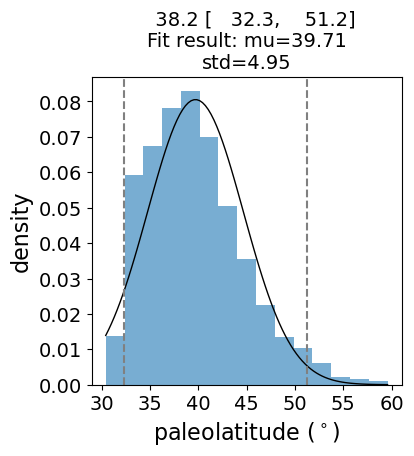

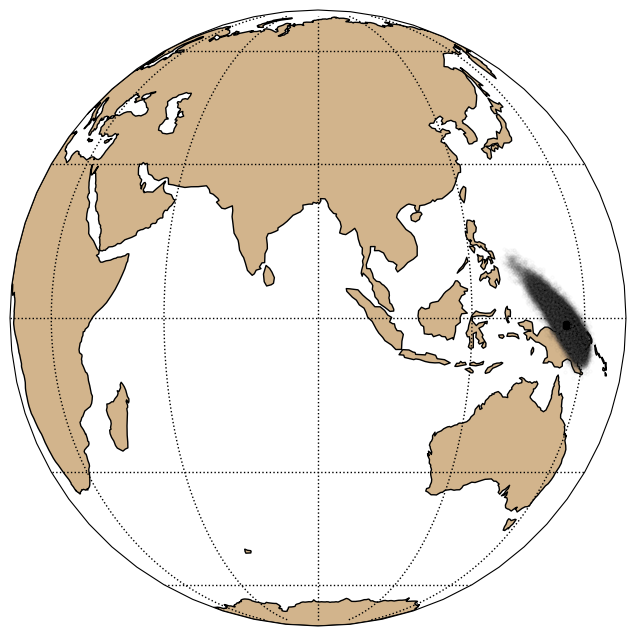

The original inclination was: 50.84

The corrected inclination is: 57.23
with bootstrapped confidence bounds of: 51.7 to 68.12
and elongation parameter of: 1.5
The flattening factor is: 0.78
with bootstrapped confidence bounds of: 0.97 to 0.49

The Kent mean incorporating inclination flattening uncertainty is:
Plon: 143.7  Plat: -1.3
Major axis lon: 54.8  Major axis lat: 40.3
Minor axis lon: 232.2  Minor axis lat: 49.6
Major axis angle of 95% ellipse (Zeta): 11.8
Minor axis angle of 95% ellipse (Eta): 3.1
Number of directions in mean (n): 100000


In [10]:
Jing2025_filtered_Kent_mean_pole = ipmag.find_ei_kent(Jing_directions_filtered_unified, Jing2025_lat, Jing2025_lon, central_longitude=90)

## Chengjiang pole

Park et al. (2021) calculated a paleomagnetic pole from the site mean data published in Jing et al. 2019 in which they transformed the site mean directions to VGPs and then calculated a mean.

Plon: 74.4  Plat: 29.4
Major axis lon: 343.1  Major axis lat: 2.3
Minor axis lon: 249.1  Minor axis lat: 60.5
Major axis angle of 95% ellipse (Zeta): 16.2
Minor axis angle of 95% ellipse (Eta): 10.9
Number of directions in mean (n): 7000


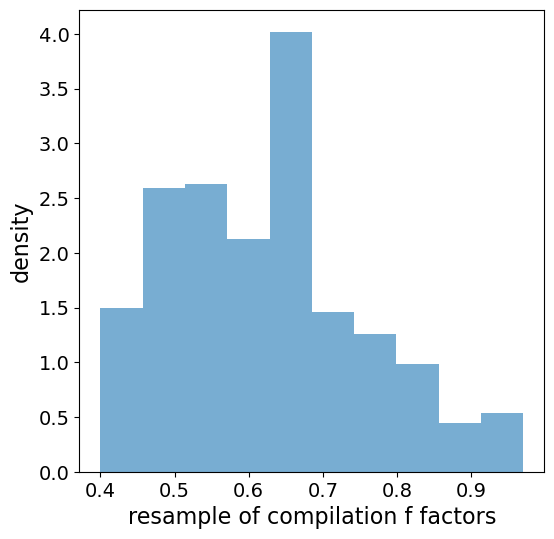

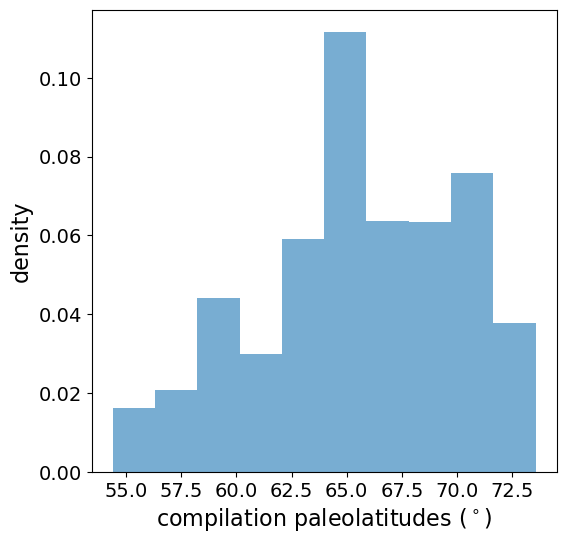

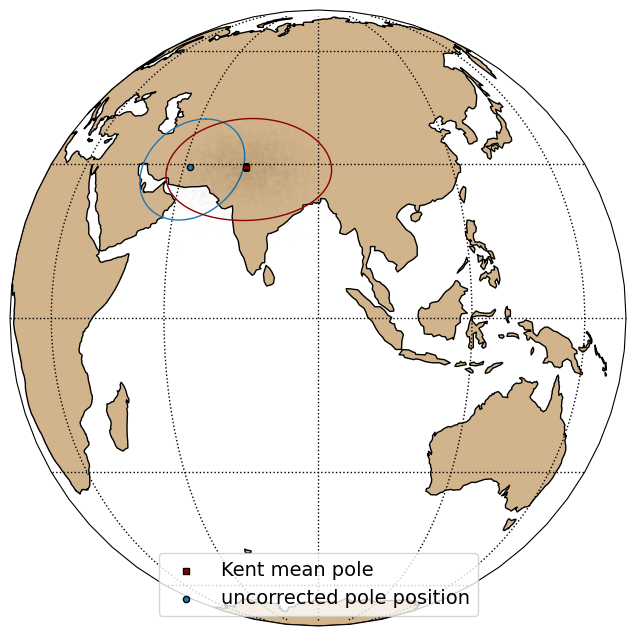

In [11]:
Chengjiang_plon = 61.5
Chengjiang_plat = 29.4
Chengjiang_A95 = 10.8
Chengjiang_lon = 102.411
Chengjiang_lat = 25.145
Chengjiang_Kent_mean = ipmag.find_compilation_kent(Chengjiang_plon, Chengjiang_plat, Chengjiang_A95, Chengjiang_lon, Chengjiang_lat,
                                                  map_central_longitude=90)

## Xiajiang pole

Plon: 104.1  Plat: 42.2
Major axis lon: 312.0  Major axis lat: 44.3
Minor axis lon: 207.5  Minor axis lat: 14.4
Major axis angle of 95% ellipse (Zeta): 14.8
Minor axis angle of 95% ellipse (Eta): 12.4
Number of directions in mean (n): 7000


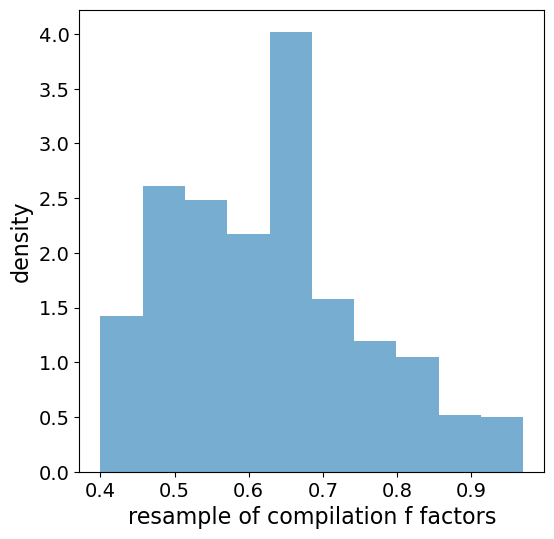

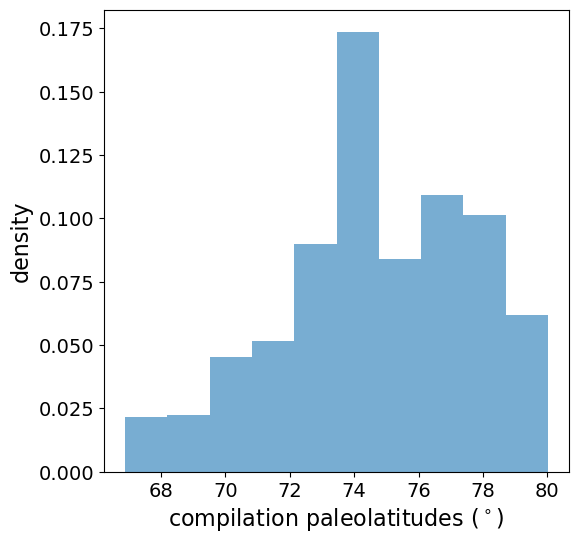

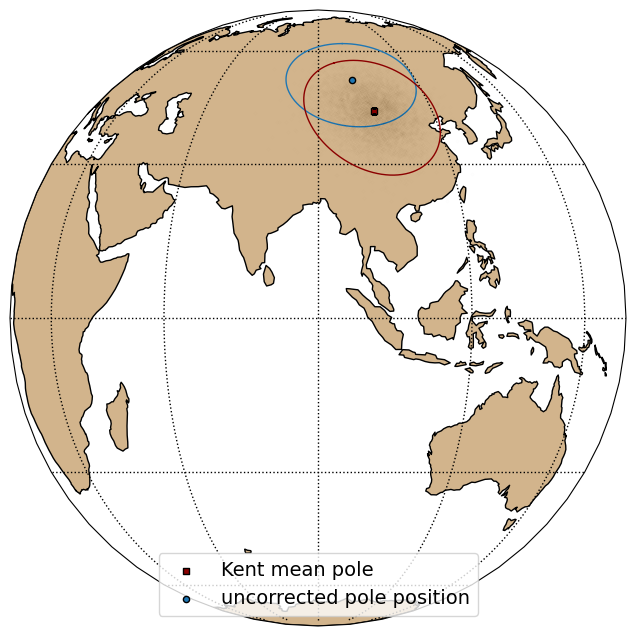

In [12]:
Xiajiang_plon = 100.0
Xiajiang_plat = 50.7
Xiajiang_A95 = 12.3
Xiajiang_lon = 108.82
Xiajiang_lat = 27.91
Xiajiang_Kent_mean = ipmag.find_compilation_kent(Xiajiang_plon, Xiajiang_plat, Xiajiang_A95, Xiajiang_lon, Xiajiang_lat,
                                                  map_central_longitude=90)

## Laoshanya Formation pole

The age of LS-C* is bracketed by high-precision CA-ID-TIMS U-Pb zircon dating of interbedded tuffs within the Laoshanya Formation:
	•	Lower tuff (mid-section): 807.52 ± 0.18/0.27/0.91 Ma
	•	Upper tuff: 804.50 ± 0.22/0.30/0.91 Ma

Using a linear age–depth model, the formation is interpreted to have been deposited between ca. 808.7 and 804.2 Ma, with the LS-C* pole assigned an age of ~807.5 Ma, corresponding to the stratigraphic level of the dated lower tuff within the paleomagnetic sampling interval.

Plon: 120.9  Plat: 44.9
Major axis lon: 259.8  Major axis lat: 37.1
Minor axis lon: 7.4  Minor axis lat: 21.8
Major axis angle of 95% ellipse (Zeta): 8.9
Minor axis angle of 95% ellipse (Eta): 5.0
Number of directions in mean (n): 7000


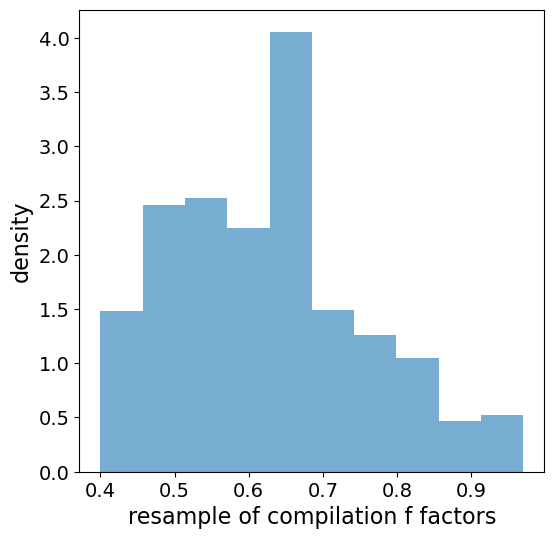

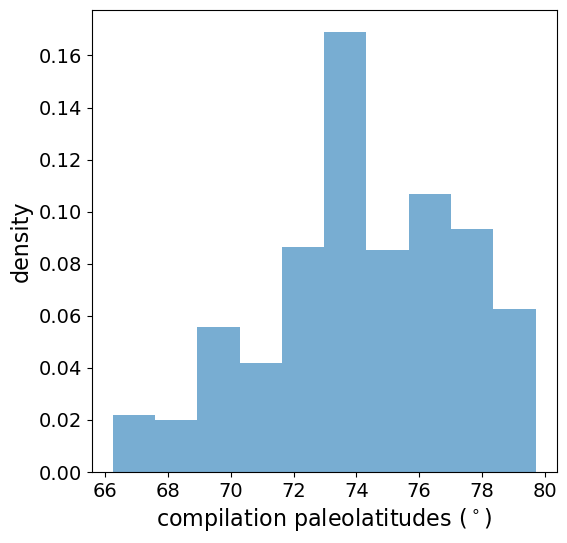

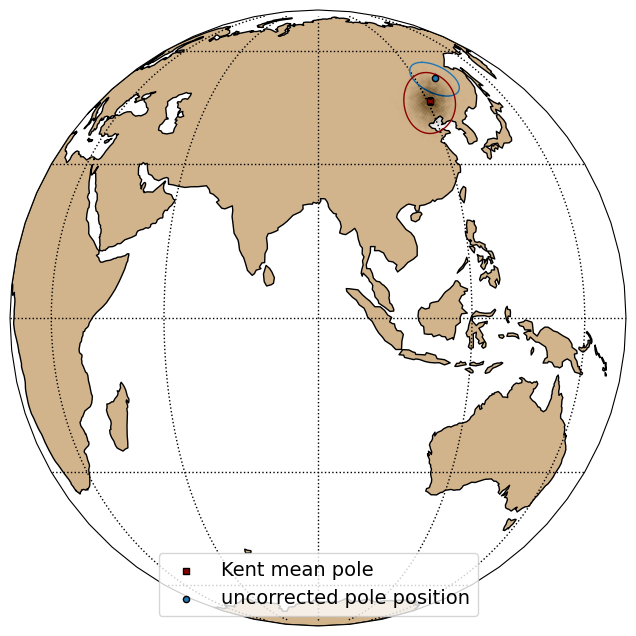

In [13]:
Laoshanya_plon = 127.2
Laoshanya_plat = 51.1
Laoshanya_A95 = 5
Laoshanya_lat = 30.0
Laoshanya_lon = 110.7
Laoshanya_Kent_mean = ipmag.find_compilation_kent(Laoshanya_plon, Laoshanya_plat, Laoshanya_A95, Laoshanya_lon, Laoshanya_lat,
                                                  map_central_longitude=90)

## Liantuo poles

Plon: 136.1  Plat: 25.1
Major axis lon: 37.2  Major axis lat: 18.2
Minor axis lon: 275.2  Minor axis lat: 58.3
Major axis angle of 95% ellipse (Zeta): 13.5
Minor axis angle of 95% ellipse (Eta): 8.9
Number of directions in mean (n): 7000


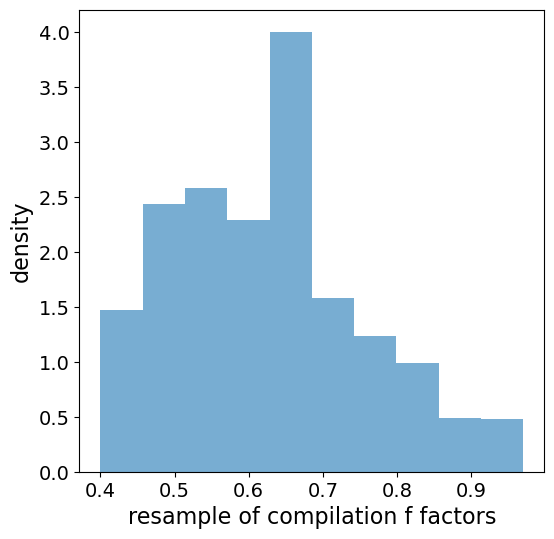

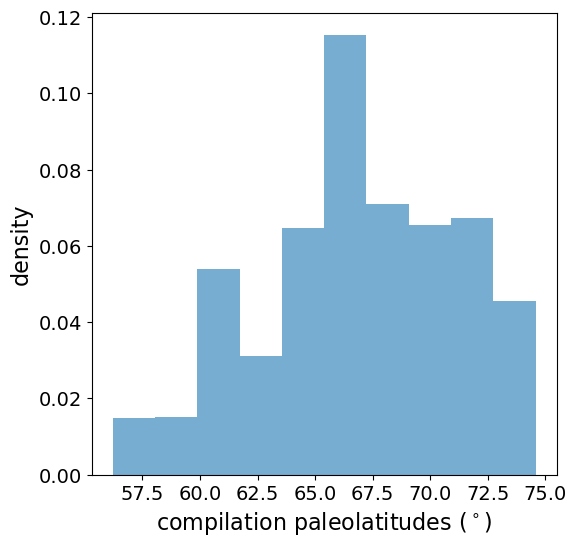

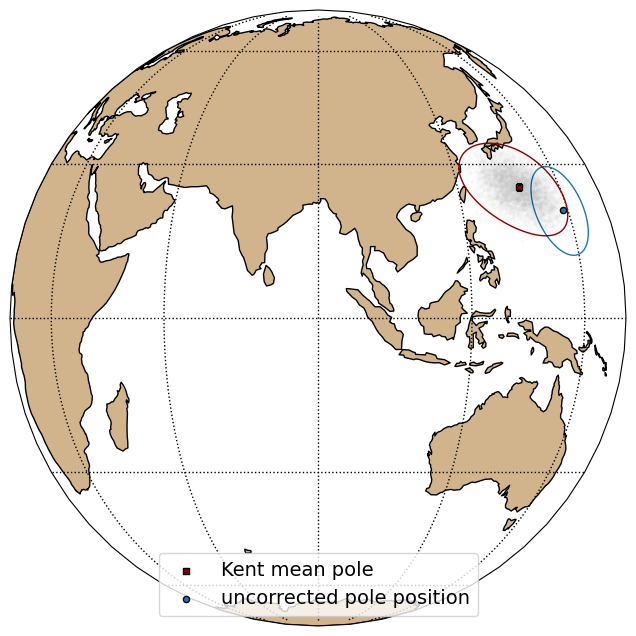

In [14]:
lower_Liantuo_plon = 148.0
lower_Liantuo_plat = 20.6
lower_Liantuo_A95 = 8.8
lower_Liantuo_lat = 30.8
lower_Liantuo_lon = 111.1
lower_Liantuo_Kent_mean = ipmag.find_compilation_kent(lower_Liantuo_plon, lower_Liantuo_plat, lower_Liantuo_A95, lower_Liantuo_lon, lower_Liantuo_lat,
                                                  map_central_longitude=90)

Plon: 145.2  Plat: 19.4
Major axis lon: 45.5  Major axis lat: 25.7
Minor axis lon: 267.9  Minor axis lat: 56.9
Major axis angle of 95% ellipse (Zeta): 15.6
Minor axis angle of 95% ellipse (Eta): 5.3
Number of directions in mean (n): 7000


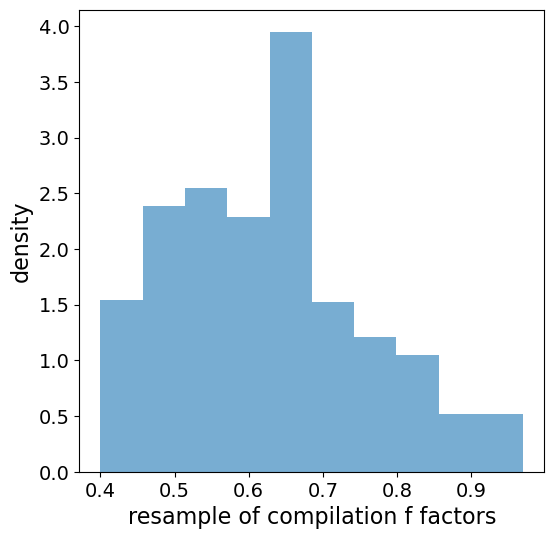

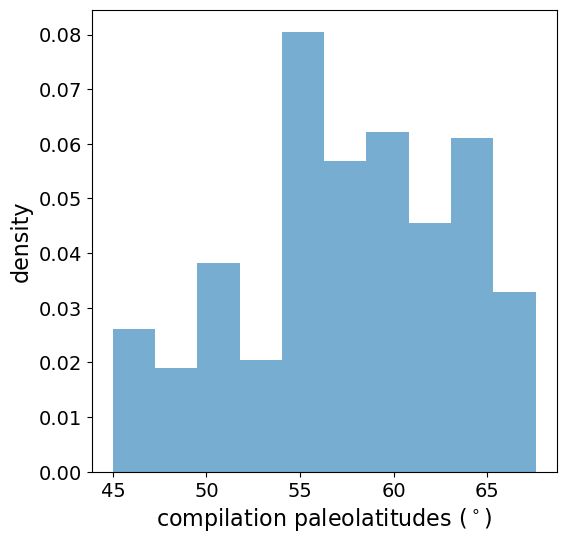

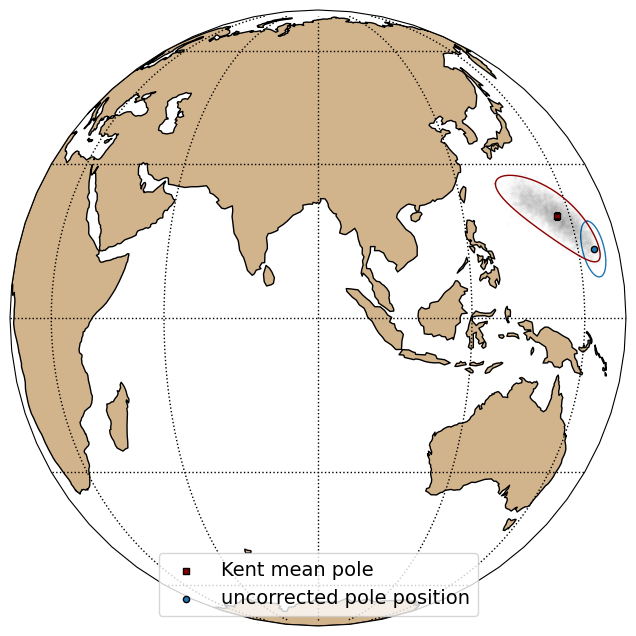

In [15]:
upper_Liantuo_plon = 157.1
upper_Liantuo_plat = 13.0
upper_Liantuo_A95 = 5.3
upper_Liantuo_lat = 30.819
upper_Liantuo_lon = 111.069
upper_Liantuo_Kent_mean = ipmag.find_compilation_kent(upper_Liantuo_plon, upper_Liantuo_plat, upper_Liantuo_A95, upper_Liantuo_lon, upper_Liantuo_lat,
                                                  map_central_longitude=90)

## Madiyi pole

Plon: 81.6  Plat: 34.4
Major axis lon: 346.6  Major axis lat: 7.3
Minor axis lon: 246.1  Minor axis lat: 54.6
Major axis angle of 95% ellipse (Zeta): 12.3
Minor axis angle of 95% ellipse (Eta): 5.1
Number of directions in mean (n): 7000


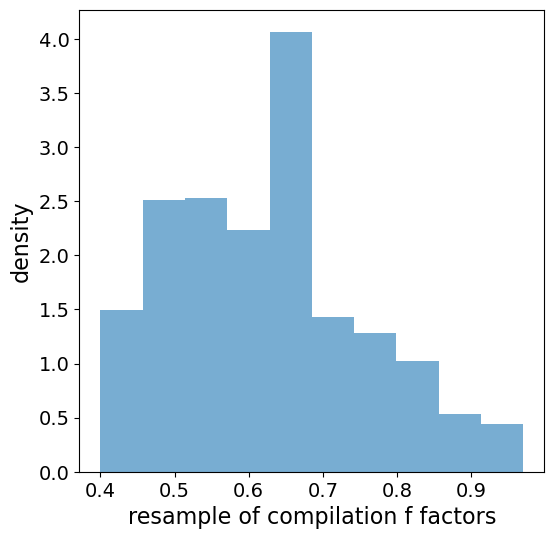

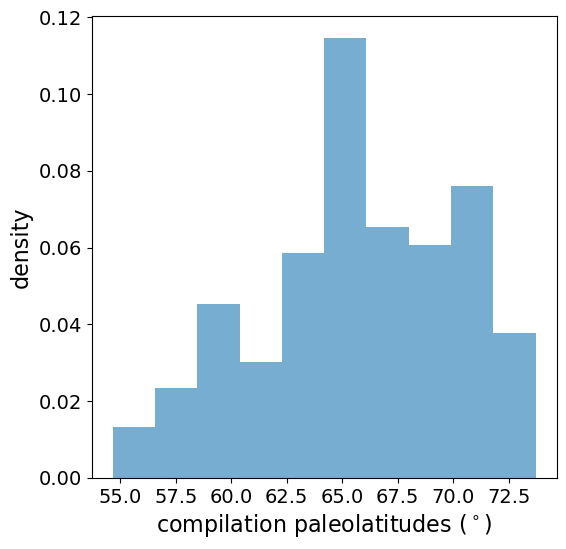

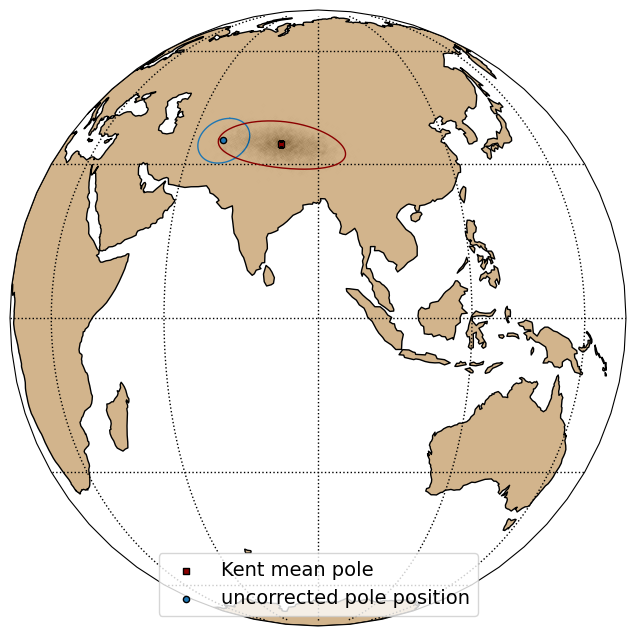

In [16]:
Madiyi_plon = 67.9
Madiyi_plat = 35.3
Madiyi_lon = 109.6
Madiyi_lat = 27.5
Madiyi_A95 = np.sqrt(4.7*5.5)

Madiyi_Kent_mean = ipmag.find_compilation_kent(Madiyi_plon, Madiyi_plat, Madiyi_A95, Madiyi_lon, Madiyi_lat,
                                                  map_central_longitude=90)

## Nantuo pole

Plon: 152.0  Plat: 15.2
Major axis lon: 55.9  Major axis lat: 21.4
Minor axis lon: 274.8  Minor axis lat: 63.3
Major axis angle of 95% ellipse (Zeta): 15.8
Minor axis angle of 95% ellipse (Eta): 4.4
Number of directions in mean (n): 7000


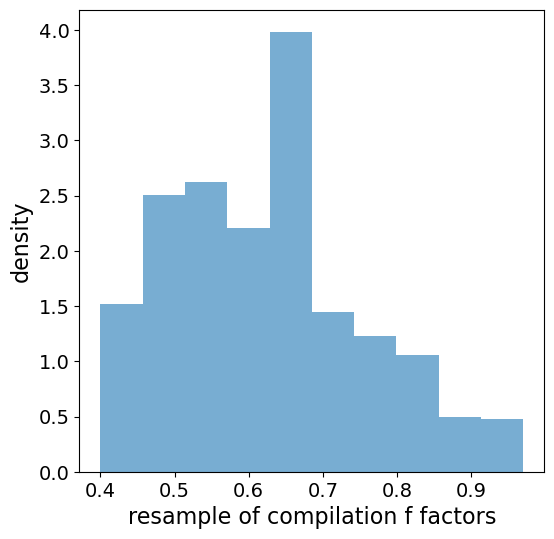

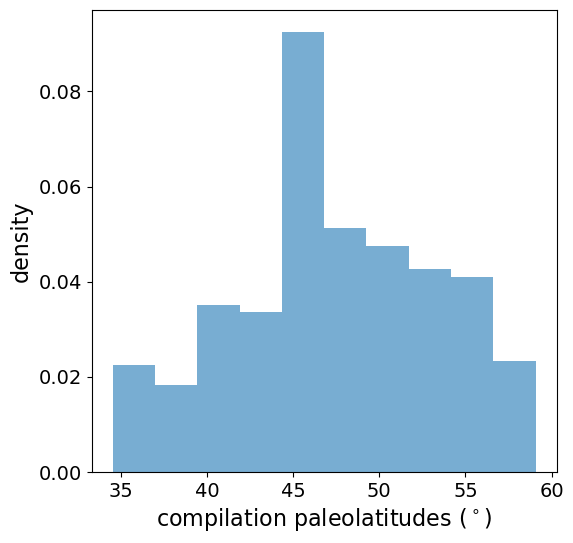

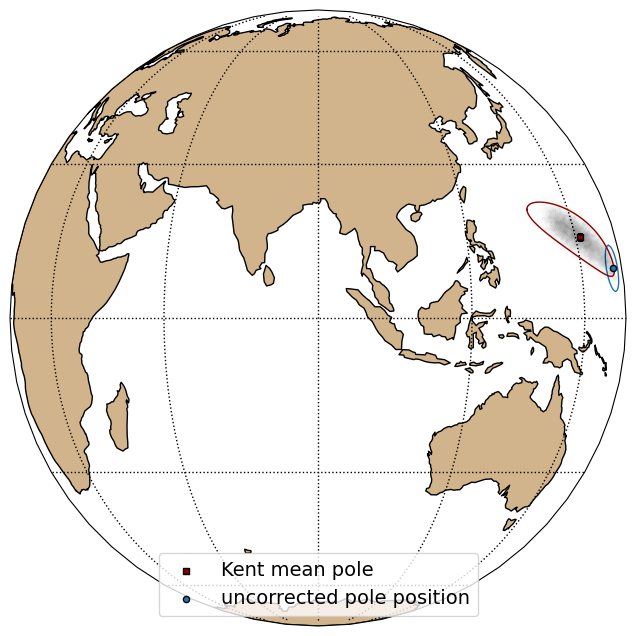

In [17]:
Nantuo_plon = 165.9
Nantuo_plat = 9.3
Nantuo_lon = 109
Nantuo_lat = 26
Nantuo_A95 = 4.3

Nantuo_Kent_mean = ipmag.find_compilation_kent(Nantuo_plon, Nantuo_plat, Nantuo_A95, Nantuo_lon, Nantuo_lat,
                                                  map_central_longitude=90)

## Xiaofeng dikes and Guzhang sills poles

In [18]:
Xiaofeng_plon = 82.1
Xiaofeng_plat = 26.1
Xiaofeng_A95 = 14.6

Guzhang_sills_plon = 116.8
Guzhang_sills_plat = 25.6
Guzhang_sills_A95 = 9.9

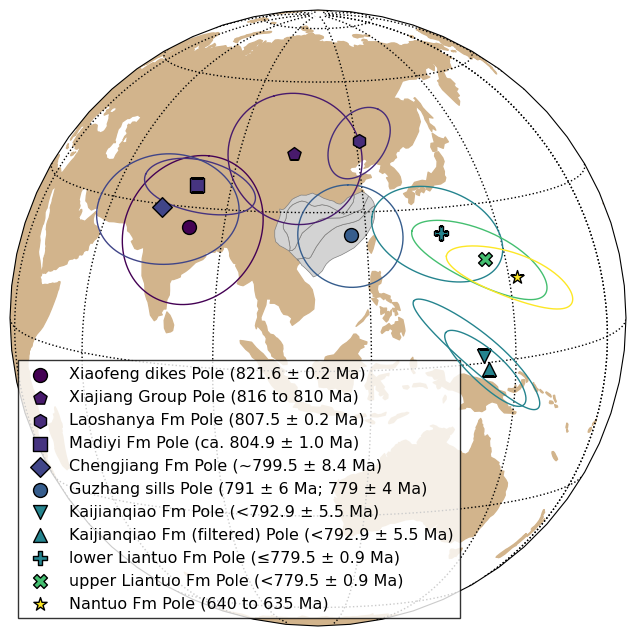

In [19]:
pole_axis = ipmag.make_orthographic_map(central_latitude=10, central_longitude=110, land_edge_color='tan')
plt.figure(num=1,figsize=(8, 8))

craton_plot(pole_axis, [60201], [[0, 0, 0]], 'grey', 'lightgrey', 1.0, 0.5, gpml='South_China_Oman_India.gpml')
craton_plot(pole_axis, [60202], [[0, 0, 0]], 'grey', 'lightgrey', 1.0, 0.5, gpml='South_China_Oman_India.gpml')
craton_plot(pole_axis, [60203], [[0, 0, 0]], 'grey', 'lightgrey', 1.0, 0.5, gpml='South_China_Oman_India.gpml')
craton_plot(pole_axis, [60204], [[0, 0, 0]], 'grey', 'lightgrey', 1.0, 0.5, gpml='South_China_Oman_India.gpml')

Xiaofeng_age = 821.64
Xiajiang_age = 813
Laoshanya_age = 807.5
Madiyi_age = 804.9
Chengjiang_age = 799.5
Guzhang_sills_age = 791
Kaijianqiao_age = 775
lower_Liantuo_age = 775
upper_Liantuo_age = 750
Nantuo_age = 640

color_map = 'viridis_r'
age_min, age_max = 720, 820
cmap = cm.get_cmap(color_map)
norm = colors.Normalize(vmin=age_min, vmax=age_max)

Xiaofeng_color = cmap(norm(Xiaofeng_age))
Xiajiang_color = cmap(norm(Xiajiang_age))
Laoshanya_color = cmap(norm(Laoshanya_age))
Madiyi_color = cmap(norm(Madiyi_age))
Chengjiang_color = cmap(norm(Chengjiang_age))
Kaijianqiao_color = cmap(norm(Kaijianqiao_age))
Guzhang_sills_color = cmap(norm(Guzhang_sills_age))
lower_Liantuo_color = cmap(norm(lower_Liantuo_age))
upper_Liantuo_color = cmap(norm(upper_Liantuo_age))
Nantuo_color = cmap(norm(Nantuo_age))

ipmag.plot_pole(pole_axis, Xiaofeng_plon, Xiaofeng_plat, Xiaofeng_A95, color=Xiaofeng_color, 
                label='Xiaofeng dikes Pole (821.6 ± 0.2 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Xiajiang_Kent_mean, lower=0, color=Xiajiang_color,
                        marker='p', label='Xiajiang Group Pole (816 to 810 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Laoshanya_Kent_mean, lower=0, color=Laoshanya_color,
                        marker='h', label='Laoshanya Fm Pole (807.5 ± 0.2 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Madiyi_Kent_mean, lower=0, color=Madiyi_color,
                        marker='s', label='Madiyi Fm Pole (ca. 804.9 ± 1.0 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Chengjiang_Kent_mean, lower=0, color=Chengjiang_color,
                        marker='D', label='Chengjiang Fm Pole (~799.5 ± 8.4 Ma)', markersize=100)
ipmag.plot_pole(pole_axis, Guzhang_sills_plon, Guzhang_sills_plat, Guzhang_sills_A95, color=Guzhang_sills_color, 
                label='Guzhang sills Pole (791 ± 6 Ma; 779 ± 4 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Jing2025_Kent_mean_pole, lower=0, color=Kaijianqiao_color, 
                        marker='v', label='Kaijianqiao Fm Pole (<792.9 ± 5.5 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Jing2025_filtered_Kent_mean_pole, lower=0, color=Kaijianqiao_color, 
                        marker='^', label='Kaijianqiao Fm (filtered) Pole (<792.9 ± 5.5 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, lower_Liantuo_Kent_mean, lower=0, color=lower_Liantuo_color, 
                        marker='P', label='lower Liantuo Fm Pole (≤779.5 ± 0.9 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, upper_Liantuo_Kent_mean, lower=0, color=upper_Liantuo_color, 
                        marker='X', label='upper Liantuo Fm Pole (<779.5 ± 0.9 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Nantuo_Kent_mean, lower=0, color=Nantuo_color, 
                        marker='*', label='Nantuo Fm Pole (640 to 635 Ma)', markersize=100)

plt.legend(loc='lower left',fancybox=False,edgecolor='black', fontsize=11.5)
plt.savefig("./output/South_China_Tonian_poles.pdf")
plt.show()

In [20]:
rotation_times = [820, 810, 800, 790, 780, 770, 760]

rotation_colors = []
for time in rotation_times:
    rotation_colors.append(cmap(norm(time)))

India_Euler_820 = [1.1, 127.4, -67.6]
India_Euler_810 = [1.2, 126.2, -60.1]
India_Euler_800 = [0.7, 129.2, -51.5]
India_Euler_790 = [0.1, 133.4, -43.1]
India_Euler_780 = [-0.9, 139.4, -35.0]
India_Euler_770 = [-2.3, 148.8, -27.5]
India_Euler_760 = [-4.5, 164.3, -21.2]

India_Eulers = [India_Euler_820,
                India_Euler_810,
                India_Euler_800,
                India_Euler_790,
                India_Euler_780,
                India_Euler_770,
                India_Euler_760]

Oman_India_Euler = [29.99, 46.42, 52.4]
South_China_India_Euler = [-13.5927, 64.9561, 60.2324]

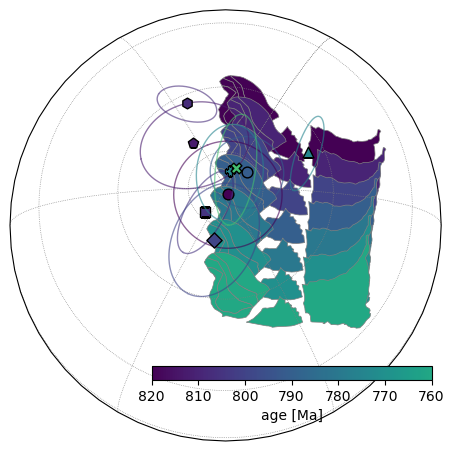

In [24]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=30, central_latitude=80,
                                 figsize=(8,8), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)
ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

for i in range(len(India_Eulers)):
    craton_plot(ax, [60201], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [60202], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [60203], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [60204], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [50100], [India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [50300], [Oman_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')

rotated_pole_plot(ax, Xiaofeng_plon, Xiaofeng_plat, Xiaofeng_A95,
                  [South_China_India_Euler, India_Eulers[0]],
                  marker='o', s=60, marker_color=Xiaofeng_color)
rotated_pole_plot(ax, Guzhang_sills_plon, Guzhang_sills_plat, Guzhang_sills_A95,
                  [South_China_India_Euler, India_Eulers[3]],
                  marker='o', s=60, marker_color=Guzhang_sills_color)
rotated_kent_pole_plot(ax, Xiajiang_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='p', s=60, marker_color=Xiajiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Laoshanya_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='h', s=60, marker_color=Laoshanya_color, alpha=0.6)
rotated_kent_pole_plot(ax, Madiyi_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='s', s=60, marker_color=Madiyi_color, alpha=0.6)
rotated_kent_pole_plot(ax, Chengjiang_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='D', s=60, marker_color=Chengjiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Jing2025_filtered_Kent_mean_pole, [South_China_India_Euler, India_Eulers[6]],
                       marker='^', s=60, marker_color=Kaijianqiao_color, alpha=0.6)
rotated_kent_pole_plot(ax, lower_Liantuo_Kent_mean, [South_China_India_Euler, India_Eulers[5]],
                       marker='P', s=60, marker_color=lower_Liantuo_color, alpha=0.6)
rotated_kent_pole_plot(ax, upper_Liantuo_Kent_mean, [South_China_India_Euler, India_Eulers[6]],
                       marker='X', s=60, marker_color=upper_Liantuo_color, alpha=0.6)

color_mapping = plt.cm.ScalarMappable(
    cmap=color_map, norm=plt.Normalize(vmin=age_min, vmax=age_max)
)
color_mapping._A = []

# Add colorbar above the plot with a white box and black outline
cbar = plt.colorbar(
    color_mapping,
    orientation="horizontal",
    shrink=0.4,
    pad=0.15,  # increase padding to move above figure
    ax=ax,
)
cbar.ax.set_xlabel("age [Ma]")

# Adjust range and invert axis
cbar.ax.set_xlim(760, 820)
cbar.ax.invert_xaxis()

# Tweak position to sit on top (fine control)
cbar.ax.set_position([0.42, 0.405, 0.35, 0.03])  # [left, bottom, width, height]

plt.savefig('./output/South_China_Tonian_poles_reconstructed.pdf')


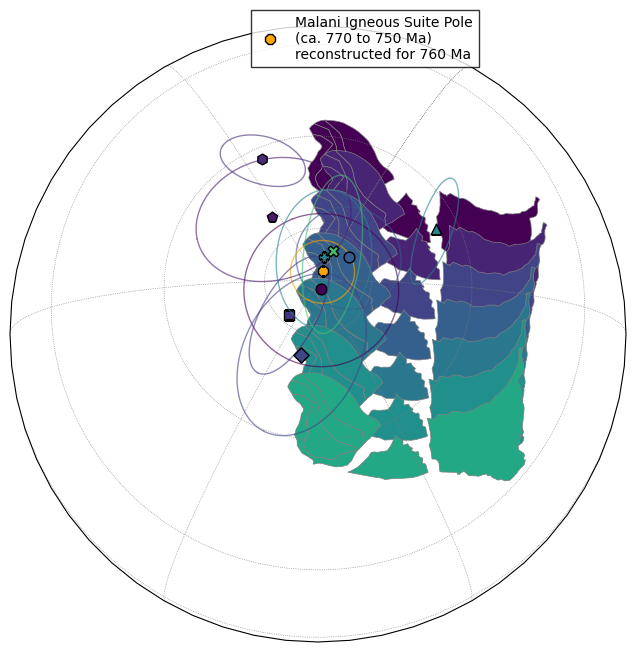

In [25]:
from matplotlib.lines import Line2D

Malani_plon = 78.6
Malani_plat = 69.4
Malani_A95 = 6.0

ax = ipmag.make_orthographic_map(add_land=False, central_longitude=30, central_latitude=80,
                                 figsize=(8,8), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)
ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

for i in range(len(India_Eulers)):
    craton_plot(ax, [60201], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [60202], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [60203], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [60204], [South_China_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [50100], [India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')
    craton_plot(ax, [50300], [Oman_India_Euler, India_Eulers[i]], 'grey', rotation_colors[i], 1.0, 0.5, gpml='South_China_Oman_India.gpml')

rotated_pole_plot(ax, Xiaofeng_plon, Xiaofeng_plat, Xiaofeng_A95,
                  [South_China_India_Euler, India_Eulers[0]],
                  marker='o', s=60, marker_color=Xiaofeng_color)
rotated_pole_plot(ax, Guzhang_sills_plon, Guzhang_sills_plat, Guzhang_sills_A95,
                  [South_China_India_Euler, India_Eulers[3]],
                  marker='o', s=60, marker_color=Guzhang_sills_color)
rotated_kent_pole_plot(ax, Xiajiang_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='p', s=60, marker_color=Xiajiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Laoshanya_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='h', s=60, marker_color=Laoshanya_color, alpha=0.6)
rotated_kent_pole_plot(ax, Madiyi_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='s', s=60, marker_color=Madiyi_color, alpha=0.6)
rotated_kent_pole_plot(ax, Chengjiang_Kent_mean, [South_China_India_Euler, India_Eulers[1]],
                       marker='D', s=60, marker_color=Chengjiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Jing2025_filtered_Kent_mean_pole, [South_China_India_Euler, India_Eulers[6]],
                       marker='^', s=60, marker_color=Kaijianqiao_color, alpha=0.6)
rotated_kent_pole_plot(ax, lower_Liantuo_Kent_mean, [South_China_India_Euler, India_Eulers[5]],
                       marker='P', s=60, marker_color=lower_Liantuo_color, alpha=0.6)
rotated_kent_pole_plot(ax, upper_Liantuo_Kent_mean, [South_China_India_Euler, India_Eulers[6]],
                       marker='X', s=60, marker_color=upper_Liantuo_color, alpha=0.6)
rotated_pole_plot(ax, Malani_plon, Malani_plat, Malani_A95,
                  [India_Eulers[6]],
                  marker='8', s=60, marker_color='orange')

color_mapping = plt.cm.ScalarMappable(
    cmap=color_map, norm=plt.Normalize(vmin=age_min, vmax=age_max)
)
color_mapping._A = []

# # Add colorbar above the plot with a white box and black outline
# cbar = plt.colorbar(
#     color_mapping,
#     orientation="horizontal",
#     shrink=0.4,
#     pad=0.15,  # increase padding to move above figure
#     ax=ax,
# )
# cbar.ax.set_xlabel("age [Ma]")

# # Adjust range and invert axis
# cbar.ax.set_xlim(760, 820)
# cbar.ax.invert_xaxis()

# # Tweak position to sit on top (fine control)
# cbar.ax.set_position([0.42, 0.405, 0.35, 0.03])  # [left, bottom, width, height]

fig = plt.gcf()
malani_handle = Line2D([], [], marker='8', linestyle='None',
                       markerfacecolor='orange', markeredgecolor='black',
                       markeredgewidth=1.0, markersize=8,
                       label='Malani Igneous Suite Pole\n(ca. 770 to 750 Ma)\nreconstructed for 760 Ma')
leg = fig.legend(handles=[malani_handle],
                 loc='lower left',
                 bbox_to_anchor=(0.42, 0.82, 0.35, 0.03),
                 frameon=True, fancybox=False, fontsize=10)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

plt.savefig('./output/South_China_India_Tonian_poles_reconstructed.pdf')